# Market Basket Analysis

In [ ]:
!pip install mlxtend

## Prepare data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CRM/1 Recommendation System/Customer Preference Survey - Weekday (Responses) - Form Responses 1.csv')

In [ ]:
df.head(5)

,Timestamp,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
0,10/20/2020 10:10:07,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,NaN,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
1,10/20/2020 10:10:09,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ
2,10/20/2020 10:10:28,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไ่ม่เคยซื้อ
3,10/20/2020 10:10:31,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/20/2020 10:10:35,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ


In [ ]:
missing = df.isnull().sum()
print(missing)

Timestamp              0
เสื้อกันฝน             0
เต็นท์                 0
เครื่อง Playstation    0
รองเท้า Vans           0
หูฟัง Bluetooth        0
โรบอทดูดฝุ่น           0
แผ่นไวนิล              0
E-Book                 0
ยาดม                   0
ลำโพงฟังเพลง           0
เครื่องฟอกอากาศในรถ    1
Pesto Sauce            0
มาสคาร่า               0
Milo Cereal Bar        0
น้ำวิตามิน             0
น้ำอัดลม               0
dtype: int64


In [ ]:
hot_encoded_df=df.fillna('ไม่เคยซื้อ')

In [ ]:
hot_encoded_df.head(5)

,Timestamp,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
0,10/20/2020 10:10:07,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
1,10/20/2020 10:10:09,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ
2,10/20/2020 10:10:28,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไ่ม่เคยซื้อ
3,10/20/2020 10:10:31,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/20/2020 10:10:35,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ


In [ ]:
del hot_encoded_df['Timestamp']

## Data Transformation

In [ ]:
def encode_units(x):
    if x == 'ไม่เคยซื้อ' or x == 'ไม่เคย' or x == 'ไ่ม่เคยซื้อ':
        return 0
    if x == 'เคยซื้อ' or x == 'เคย':
        return 1
#hot_encoded_df.applymap(encode_units).head(10)
hot_encoded_cleaned_df = hot_encoded_df.applymap(encode_units)
hot_encoded_cleaned_df.head(10)

,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1
2,1,0,1,0,1,0,0,1,1,1,0,1,0,1,0,0
3,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1
4,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1
5,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1
6,0,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1
7,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1
8,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1
9,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1


## Run Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_cleaned_df, 
                            min_support=0.1, 
                            use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(เสื้อกันฝน),(เต็นท์),0.857143,0.285714,0.285714,0.333333,1.166667,0.040816,1.071429
1,(เต็นท์),(เสื้อกันฝน),0.285714,0.857143,0.285714,1.000000,1.166667,0.040816,inf
2,(เสื้อกันฝน),(เครื่อง Playstation),0.857143,0.428571,0.380952,0.444444,1.037037,0.013605,1.028571
3,(เครื่อง Playstation),(เสื้อกันฝน),0.428571,0.857143,0.380952,0.888889,1.037037,0.013605,1.285714
4,(เสื้อกันฝน),(โรบอทดูดฝุ่น),0.857143,0.142857,0.142857,0.166667,1.166667,0.020408,1.028571
5,(โรบอทดูดฝุ่น),(เสื้อกันฝน),0.142857,0.857143,0.142857,1.000000,1.166667,0.020408,inf
6,(เสื้อกันฝน),(แผ่นไวนิล ),0.857143,0.333333,0.333333,0.388889,1.166667,0.047619,1.090909
7,(แผ่นไวนิล ),(เสื้อกันฝน),0.333333,0.857143,0.333333,1.000000,1.166667,0.047619,inf
8,(E-Book),(เสื้อกันฝน),0.666667,0.857143,0.666667,1.000000,1.166667,0.095238,inf
9,(เสื้อกันฝน),(E-Book),0.857143,0.666667,0.666667,0.777778,1.166667,0.095238,1.500000


In [ ]:
rules.shape

(29676, 9)

In [ ]:
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
463,"(น้ำอัดลม, แผ่นไวนิล )","(เสื้อกันฝน, ลำโพงฟังเพลง)",0.333333,0.714286,0.333333,1.0,1.400000,0.095238,inf
800,"(E-Book, ยาดม, หูฟัง Bluetooth, ลำโพงฟังเพลง)",(เสื้อกันฝน),0.333333,0.857143,0.333333,1.0,1.166667,0.047619,inf
1041,"(E-Book, น้ำวิตามิน, ลำโพงฟังเพลง)","(เสื้อกันฝน, น้ำอัดลม)",0.428571,0.809524,0.428571,1.0,1.235294,0.081633,inf
946,"(E-Book, เสื้อกันฝน, ยาดม, น้ำวิตามิน)",(ลำโพงฟังเพลง),0.380952,0.857143,0.380952,1.0,1.166667,0.054422,inf
799,"(E-Book, เสื้อกันฝน, หูฟัง Bluetooth, ลำโพงฟัง...",(ยาดม),0.333333,0.761905,0.333333,1.0,1.312500,0.079365,inf
131,"(E-Book, น้ำวิตามิน)",(เสื้อกันฝน),0.523810,0.857143,0.523810,1.0,1.166667,0.074830,inf
798,"(E-Book, เสื้อกันฝน, ยาดม, หูฟัง Bluetooth)",(ลำโพงฟังเพลง),0.333333,0.857143,0.333333,1.0,1.166667,0.047619,inf
711,"(น้ำวิตามิน, หูฟัง Bluetooth, ลำโพงฟังเพลง)",(น้ำอัดลม),0.380952,0.952381,0.380952,1.0,1.050000,0.018141,inf
950,"(E-Book, ยาดม, น้ำวิตามิน, ลำโพงฟังเพลง)",(เสื้อกันฝน),0.380952,0.857143,0.380952,1.0,1.166667,0.054422,inf
718,"(E-Book, น้ำอัดลม, แผ่นไวนิล )",(ลำโพงฟังเพลง),0.333333,0.857143,0.333333,1.0,1.166667,0.047619,inf


filter result with lift >= 1 and confidence >= 0.5

In [ ]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
463,"(น้ำอัดลม, แผ่นไวนิล )","(เสื้อกันฝน, ลำโพงฟังเพลง)",0.333333,0.714286,0.333333,1.0,1.400000,0.095238,inf
800,"(E-Book, ยาดม, หูฟัง Bluetooth, ลำโพงฟังเพลง)",(เสื้อกันฝน),0.333333,0.857143,0.333333,1.0,1.166667,0.047619,inf
1041,"(E-Book, น้ำวิตามิน, ลำโพงฟังเพลง)","(เสื้อกันฝน, น้ำอัดลม)",0.428571,0.809524,0.428571,1.0,1.235294,0.081633,inf
946,"(E-Book, เสื้อกันฝน, ยาดม, น้ำวิตามิน)",(ลำโพงฟังเพลง),0.380952,0.857143,0.380952,1.0,1.166667,0.054422,inf
799,"(E-Book, เสื้อกันฝน, หูฟัง Bluetooth, ลำโพงฟัง...",(ยาดม),0.333333,0.761905,0.333333,1.0,1.312500,0.079365,inf
...,...,...,...,...,...,...,...,...,...
681,(ยาดม),"(น้ำวิตามิน, หูฟัง Bluetooth, ลำโพงฟังเพลง)",0.761905,0.380952,0.380952,0.5,1.312500,0.090703,1.238095
438,(E-Book),"(เสื้อกันฝน, แผ่นไวนิล , ลำโพงฟังเพลง)",0.666667,0.333333,0.333333,0.5,1.500000,0.111111,1.333333
452,(E-Book),"(เสื้อกันฝน, น้ำอัดลม, แผ่นไวนิล )",0.666667,0.333333,0.333333,0.5,1.500000,0.111111,1.333333
282,(E-Book),"(น้ำอัดลม, Milo Cereal Bar)",0.666667,0.476190,0.333333,0.5,1.050000,0.015873,1.047619


try to filter only 1 item in antecedents and	consequents 

In [ ]:
def count_item (row,col):
   return len(row[col])

In [ ]:
rules['num_antecedents'] = rules.apply(lambda row:count_item(row,'antecedents'), 
                                       axis=1)
rules['num_consequents'] = rules.apply(lambda row:count_item(row,'consequents'), 
                                        axis=1)

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,num_antecedents,num_consequents
463,"(น้ำอัดลม, แผ่นไวนิล )","(เสื้อกันฝน, ลำโพงฟังเพลง)",0.333333,0.714286,0.333333,1.0,1.400000,0.095238,inf,2,2
800,"(E-Book, ยาดม, หูฟัง Bluetooth, ลำโพงฟังเพลง)",(เสื้อกันฝน),0.333333,0.857143,0.333333,1.0,1.166667,0.047619,inf,4,1
1041,"(E-Book, น้ำวิตามิน, ลำโพงฟังเพลง)","(เสื้อกันฝน, น้ำอัดลม)",0.428571,0.809524,0.428571,1.0,1.235294,0.081633,inf,3,2
946,"(E-Book, เสื้อกันฝน, ยาดม, น้ำวิตามิน)",(ลำโพงฟังเพลง),0.380952,0.857143,0.380952,1.0,1.166667,0.054422,inf,4,1
799,"(E-Book, เสื้อกันฝน, หูฟัง Bluetooth, ลำโพงฟัง...",(ยาดม),0.333333,0.761905,0.333333,1.0,1.312500,0.079365,inf,4,1


In [ ]:
ant_morethan1 = rules['num_antecedents']==1

In [ ]:
rules_ant = rules[ant_morethan1]

In [ ]:
con_morethan1 = rules_ant['num_consequents']==1
rules_ant_con = rules_ant[con_morethan1]

In [ ]:
rules_ant_con.shape

(112, 11)

only 1 item in antecedents and consequents 

In [ ]:
rules_ant_con.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,num_antecedents,num_consequents
54,(มาสคาร่า),(น้ำอัดลม),0.380952,0.952381,0.380952,1.0,1.050000,0.018141,inf,1,1
57,(น้ำวิตามิน),(น้ำอัดลม),0.666667,0.952381,0.666667,1.0,1.050000,0.031746,inf,1,1
35,(แผ่นไวนิล ),(น้ำอัดลม),0.333333,0.952381,0.333333,1.0,1.050000,0.015873,inf,1,1
32,(แผ่นไวนิล ),(ลำโพงฟังเพลง),0.333333,0.857143,0.333333,1.0,1.166667,0.047619,inf,1,1
3,(แผ่นไวนิล ),(เสื้อกันฝน),0.333333,0.857143,0.333333,1.0,1.166667,0.047619,inf,1,1


In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2020-10-20 04:42:54--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2020-10-20 04:42:54--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.03s   

2020-10-20 04:42:55 (2.99 MB/s) - ‘thsara

In [ ]:
import matplotlib.font_manager as fm
 
font_list = fm.createFontList(['thsarabunnew-webfont.ttf'])
fm.fontManager.ttflist.extend(font_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

## visualize result with graph

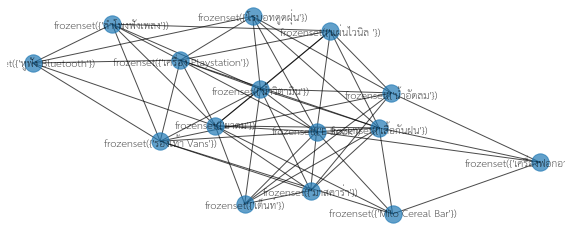

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules_ant_con,source='antecedents',
                           target='consequents')
labels_params = {"font_family":"TH Sarabun New", 
                 "alpha":.7, 
                 "font_size":10 }
nx.draw(GA,
        with_labels=True, 
        font_family="TH Sarabun New", 
        alpha=.7, 
        font_size=10)
plt.show()

In [ ]:
hot_encoded_cleaned_df.head()

,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1
2,1,0,1,0,1,0,0,1,1,1,0,1,0,1,0,0
3,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1
4,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1


# Collaborative Filtering

In [ ]:
item_item_matrix = pd.DataFrame(index=hot_encoded_cleaned_df.columns,
                                columns=hot_encoded_cleaned_df.columns)

In [ ]:
item_item_matrix.head()

,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
เสื้อกันฝน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เต็นท์,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เครื่อง Playstation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
รองเท้า Vans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
หูฟัง Bluetooth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


calculate similarity between item

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 - cosine(hot_encoded_cleaned_df.iloc[:,i],
                                              hot_encoded_cleaned_df.iloc[:,j])

In [ ]:
item_item_matrix.head()

,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
เสื้อกันฝน,1,0.57735,0.628539,0.445435,0.730297,0.408248,0.62361,0.881917,0.883883,0.833333,0.408248,0.333333,0.583333,0.710669,0.818923,0.895979
เต็นท์,0.57735,1,0.272166,0,0.421637,0,0.308607,0.436436,0.612372,0.481125,0.235702,0,0.433013,0.123091,0.436436,0.547723
เครื่อง Playstation,0.628539,0.272166,1,0.377964,0.602464,0.57735,0.377964,0.62361,0.583333,0.628539,0.19245,0.235702,0.353553,0.402015,0.712697,0.596285
รองเท้า Vans,0.445435,0,0.377964,1,0.48795,0.436436,0.285714,0.505076,0.472456,0.534522,0.436436,0,0.400892,0.455842,0.606092,0.591608
หูฟัง Bluetooth,0.730297,0.421637,0.602464,0.48795,1,0.447214,0.39036,0.552052,0.774597,0.852013,0.149071,0.365148,0.456435,0.544949,0.621059,0.80829


In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links.head()

,item,related item,value
0,เสื้อกันฝน,เสื้อกันฝน,1
1,เสื้อกันฝน,เต็นท์,0.57735
2,เสื้อกันฝน,เครื่อง Playstation,0.628539
3,เสื้อกันฝน,รองเท้า Vans,0.445435
4,เสื้อกันฝน,หูฟัง Bluetooth,0.730297


filter data

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.5) & 
                         (links['item'] != links['related item']) ]

In [ ]:
links_filtered.head()

,item,related item,value
1,เสื้อกันฝน,เต็นท์,0.57735
2,เสื้อกันฝน,เครื่อง Playstation,0.628539
4,เสื้อกันฝน,หูฟัง Bluetooth,0.730297
6,เสื้อกันฝน,แผ่นไวนิล,0.62361
7,เสื้อกันฝน,E-Book,0.881917


In [ ]:
links_filtered.shape

(108, 3)

## visualize result with graph

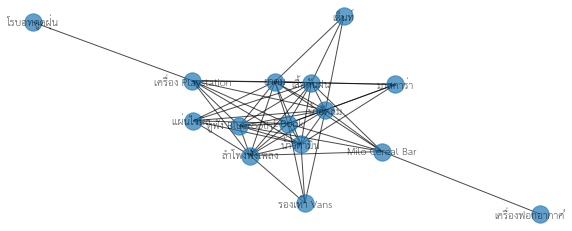

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',
                           target='related item')
nx.draw(GA,
        with_labels=True,
        font_family="TH Sarabun New", 
        alpha=.7, font_size=10)
plt.show()